This final notebook is concerned with visualising the Tidal Swing data. In order to animate the tidal data, an interpolation between High and Low tide is required, so that the current state of the tide can be plotted on a frame-by frame basis. 

Plotting/animating was performed frame-wise, and the resulting frames were strung together to form the final GIFs. 

In [2]:
import numpy as np
import scipy as sp
from scipy.interpolate import pchip_interpolate
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point
from geopandas.tools import geocode

## High/Low tide interpolation

In [4]:
df = pd.read_csv('final_geo_tide_df.csv', index_col = 0)

In [5]:
df

,Port,Date,Time,Height,HiLo,geometry,address
0,Aberdaron,2024-03-01,05:43,1.04,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
1,Aberdaron,2024-03-01,11:24,3.97,High,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
2,Aberdaron,2024-03-01,18:07,1.23,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
3,Aberdaron,2024-03-01,23:48,3.71,High,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
4,Aberdaron,2024-03-02,06:16,1.31,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
...,...,...,...,...,...,...,...
79598,Youghal,2024-03-30,20:26,3.56,High,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"
79599,Youghal,2024-03-31,03:53,0.87,Low,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"
79600,Youghal,2024-03-31,09:47,3.45,High,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"
79601,Youghal,2024-03-31,16:11,0.99,Low,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"


In [6]:
df1 = df[df.Port == 'Aberdaron'] # single port town to test on
df1

,Port,Date,Time,Height,HiLo,geometry,address
0,Aberdaron,2024-03-01,05:43,1.04,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
1,Aberdaron,2024-03-01,11:24,3.97,High,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
2,Aberdaron,2024-03-01,18:07,1.23,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
3,Aberdaron,2024-03-01,23:48,3.71,High,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
4,Aberdaron,2024-03-02,06:16,1.31,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
...,...,...,...,...,...,...,...
114,Aberdaron,2024-03-30,17:39,1.15,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
115,Aberdaron,2024-03-30,23:17,3.94,High,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
116,Aberdaron,2024-03-31,06:57,1.20,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
117,Aberdaron,2024-03-31,12:34,3.81,High,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."


In [7]:
df1['Datetime'] = df1.Date + ' ' + df1.Time # Create new datetime column
df1.Datetime

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0      2024-03-01 05:43
1      2024-03-01 11:24
2      2024-03-01 18:07
3      2024-03-01 23:48
4      2024-03-02 06:16
             ...       
114    2024-03-30 17:39
115    2024-03-30 23:17
116    2024-03-31 06:57
117    2024-03-31 12:34
118    2024-03-31 19:16
Name: Datetime, Length: 119, dtype: object

In [9]:
df1.Datetime = df1.Datetime.apply(pd.to_datetime, format='%Y-%m-%d %H:%M') # convert to Datetime object

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


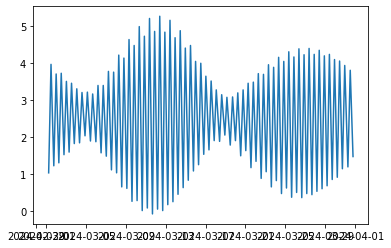

In [10]:
plt.plot(df1.Datetime, df1.Height)

In [11]:
start_date = '2024-03-01' # Some date bounds for testing
end_date = '2024-03-03'

In [12]:
df2 = df1[(df1.Datetime >=start_date) & (df1.Datetime <= end_date)]

In [13]:
df2.tail()

,Port,Date,Time,Height,HiLo,geometry,address,Datetime
2,Aberdaron,2024-03-01,18:07,1.23,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",2024-03-01 18:07:00
3,Aberdaron,2024-03-01,23:48,3.71,High,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",2024-03-01 23:48:00
4,Aberdaron,2024-03-02,06:16,1.31,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",2024-03-02 06:16:00
5,Aberdaron,2024-03-02,12:02,3.73,High,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",2024-03-02 12:02:00
6,Aberdaron,2024-03-02,18:40,1.53,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",2024-03-02 18:40:00


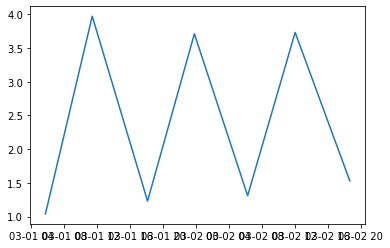

In [14]:
plt.plot(df2.Datetime, df2.Height)

 - I need to interpolate these points to get a smooth curve

In [15]:
x_obs = df2.Datetime # observed data for interpolation
y_obs = df2.Height
x = pd.to_datetime(np.linspace(min(x_obs).value, max(x_obs).value, num=4*(len(x_obs)-1)+1)) # datetime linspace for interpolation
# .value is required for linspace to work with datetime objects

In [16]:
x

DatetimeIndex([       '2024-03-01 05:43:00', '2024-03-01 07:15:22.500000',
                      '2024-03-01 08:47:45', '2024-03-01 10:20:07.500000',
                      '2024-03-01 11:52:30', '2024-03-01 13:24:52.500000',
                      '2024-03-01 14:57:15', '2024-03-01 16:29:37.500000',
                      '2024-03-01 18:02:00', '2024-03-01 19:34:22.500000',
                      '2024-03-01 21:06:45', '2024-03-01 22:39:07.500000',
                      '2024-03-02 00:11:30', '2024-03-02 01:43:52.500000',
                      '2024-03-02 03:16:15', '2024-03-02 04:48:37.500000',
                      '2024-03-02 06:21:00', '2024-03-02 07:53:22.500000',
                      '2024-03-02 09:25:45', '2024-03-02 10:58:07.500000',
                      '2024-03-02 12:30:30', '2024-03-02 14:02:52.500000',
                      '2024-03-02 15:35:15', '2024-03-02 17:07:37.500000',
                      '2024-03-02 18:40:00'],
              dtype='datetime64[ns]', freq=None)

In [17]:
y = pchip_interpolate(x_obs, y_obs, x)  # Piecewise Cubic Hermite Interpolating polynomial
y

array([1.04      , 2.3369021 , 3.29516653, 3.8522386 , 3.93082783,
       3.37837416, 2.48030332, 1.63260149, 1.23125486, 1.63502962,
       2.57081009, 3.44734982, 3.68465426, 3.19568647, 2.37802129,
       1.62031052, 1.31150148, 1.77713065, 2.69518066, 3.51302506,
       3.72093749, 3.55700708, 3.1605135 , 2.49649755, 1.53      ])

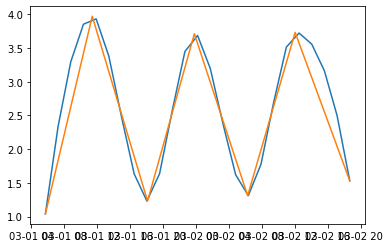

In [18]:
plt.plot(x, y)
plt.plot(x_obs, y_obs)

That looks pretty good - issues with extrema however

In [21]:
full_date_range = df1.Datetime
full_date_range

0     2024-03-01 05:43:00
1     2024-03-01 11:24:00
2     2024-03-01 18:07:00
3     2024-03-01 23:48:00
4     2024-03-02 06:16:00
              ...        
114   2024-03-30 17:39:00
115   2024-03-30 23:17:00
116   2024-03-31 06:57:00
117   2024-03-31 12:34:00
118   2024-03-31 19:16:00
Name: Datetime, Length: 119, dtype: datetime64[ns]

In [22]:
def interpolate_height_per_port(port_name, df_source, interp_res = 6):
    '''For a given port name in df_source, interpolate tide height data between
    lows and highs, with interp_res number of points between those lows and highs'''
    
    df = df_source[df_source.Port == port_name]
    
    geom = df.geometry
    address = df.address
    
    x_obs = df.Datetime
    y_obs = df.Height
    x = pd.to_datetime(np.linspace(x_obs[0].value, 
                                   x_obs[len(x_obs)-1].value, 
                                   num=interp_res*(len(x_obs)-1))+1)
    y = pchip_interpolate(x_obs, y_obs, x) # Piecewise cubic hermite interpolating polynomial
    
    return pd.DataFrame({'Port': port_name,
                        'Datetime': x,
                        'Height': y})

In [23]:
aberdaron_test = interpolate_height_per_port('Aberdaron', df1)

In [24]:
aberdaron_test

,Port,Datetime,Height
0,Aberdaron,2024-03-01 05:43:00.000000000,1.040000
1,Aberdaron,2024-03-01 06:45:15.190947584,1.948176
2,Aberdaron,2024-03-01 07:47:30.381895424,2.711818
3,Aberdaron,2024-03-01 08:49:45.572843008,3.311781
4,Aberdaron,2024-03-01 09:52:00.763790592,3.728918
...,...,...,...
703,Aberdaron,2024-03-31 15:06:59.236209408,3.529164
704,Aberdaron,2024-03-31 16:09:14.427156992,3.226091
705,Aberdaron,2024-03-31 17:11:29.618104576,2.792914
706,Aberdaron,2024-03-31 18:13:44.809052416,2.215571


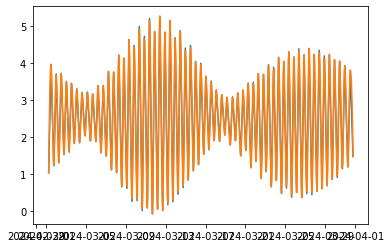

In [26]:
plt.plot(df1.Datetime, df1.Height)
plt.plot(aberdaron_test.Datetime, aberdaron_test.Height)

While this seems to have worked, I think I need to change tack slightly - this currently splits up the time between the start and end high/low of the month evenly, but they won't be the same for all of the ports. Maybe I need to go more granular, and interpolate between all of the points at a regular time interval between 00:00 and 0:00 of 01/03 and 01/04 of 2024 

In [27]:
df

,Port,Date,Time,Height,HiLo,geometry,address
0,Aberdaron,2024-03-01,05:43,1.04,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
1,Aberdaron,2024-03-01,11:24,3.97,High,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
2,Aberdaron,2024-03-01,18:07,1.23,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
3,Aberdaron,2024-03-01,23:48,3.71,High,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
4,Aberdaron,2024-03-02,06:16,1.31,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
...,...,...,...,...,...,...,...
79598,Youghal,2024-03-30,20:26,3.56,High,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"
79599,Youghal,2024-03-31,03:53,0.87,Low,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"
79600,Youghal,2024-03-31,09:47,3.45,High,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"
79601,Youghal,2024-03-31,16:11,0.99,Low,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"


In [28]:
locations = df.Port.unique()
len(locations)

705

In [29]:
lengths = []

for port in locations:
    lengths.append(len(df[df.Port == port]))

In [30]:
lengths

[119,
 120,
 119,
 119,
 119,
 120,
 120,
 60,
 60,
 120,
 120,
 60,
 119,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 119,
 60,
 120,
 120,
 120,
 120,
 60,
 120,
 120,
 119,
 120,
 120,
 60,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 119,
 120,
 120,
 120,
 120,
 120,
 60,
 60,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 60,
 60,
 120,
 120,
 120,
 120,
 119,
 120,
 60,
 120,
 120,
 118,
 120,
 120,
 120,
 120,
 120,
 60,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 60,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 60,
 119,
 120,
 120,
 120,
 120,
 180,
 120,
 120,
 120,
 119,
 120,
 180,
 120,
 60,
 120,
 120,
 59,
 120,
 120,
 60,
 60,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 120,
 120,
 60,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 60,
 60,
 120,
 120,
 120,
 60,
 60,
 119,
 60,
 60,
 60,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,


for some reason some areas only have High Tides listes - likely inland areas. Need to drop these

In [31]:
df[df.Port==locations[7]] # example point with only high tide values

,Port,Date,Time,Height,HiLo,geometry,address
836,Allington Lock,2024-03-01,04:16,3.25,High,POINT (0.4867331707150007 51.3093091),"Aylesford, Tonbridge and Malling, Kent, Englan..."
837,Allington Lock,2024-03-01,16:40,3.14,High,POINT (0.4867331707150007 51.3093091),"Aylesford, Tonbridge and Malling, Kent, Englan..."
838,Allington Lock,2024-03-02,04:46,3.10,High,POINT (0.4867331707150007 51.3093091),"Aylesford, Tonbridge and Malling, Kent, Englan..."
839,Allington Lock,2024-03-02,17:13,2.95,High,POINT (0.4867331707150007 51.3093091),"Aylesford, Tonbridge and Malling, Kent, Englan..."
840,Allington Lock,2024-03-03,05:24,2.90,High,POINT (0.4867331707150007 51.3093091),"Aylesford, Tonbridge and Malling, Kent, Englan..."
841,Allington Lock,2024-03-03,17:54,2.71,High,POINT (0.4867331707150007 51.3093091),"Aylesford, Tonbridge and Malling, Kent, Englan..."
842,Allington Lock,2024-03-04,06:13,2.64,High,POINT (0.4867331707150007 51.3093091),"Aylesford, Tonbridge and Malling, Kent, Englan..."
843,Allington Lock,2024-03-04,18:49,2.43,High,POINT (0.4867331707150007 51.3093091),"Aylesford, Tonbridge and Malling, Kent, Englan..."
844,Allington Lock,2024-03-05,07:23,2.39,High,POINT (0.4867331707150007 51.3093091),"Aylesford, Tonbridge and Malling, Kent, Englan..."
845,Allington Lock,2024-03-05,20:08,2.27,High,POINT (0.4867331707150007 51.3093091),"Aylesford, Tonbridge and Malling, Kent, Englan..."


In [32]:
for loc, lens in zip(locations, lengths):
    
    if lens<110:
        df.drop(df.loc[df['Port']==loc].index, inplace=True)

In [33]:
df[df.Port==locations[7]]

,Port,Date,Time,Height,HiLo,geometry,address


In [34]:
df

,Port,Date,Time,Height,HiLo,geometry,address
0,Aberdaron,2024-03-01,05:43,1.04,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
1,Aberdaron,2024-03-01,11:24,3.97,High,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
2,Aberdaron,2024-03-01,18:07,1.23,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
3,Aberdaron,2024-03-01,23:48,3.71,High,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
4,Aberdaron,2024-03-02,06:16,1.31,Low,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
...,...,...,...,...,...,...,...
79598,Youghal,2024-03-30,20:26,3.56,High,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"
79599,Youghal,2024-03-31,03:53,0.87,Low,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"
79600,Youghal,2024-03-31,09:47,3.45,High,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"
79601,Youghal,2024-03-31,16:11,0.99,Low,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"


In [35]:
lengths_2 = []

for port in df.Port.unique():
    lengths_2.append(len(df[df.Port == port]))

In [36]:
lengths_2 # High/Low data per port - all roughly equal and should have alternating high/lows

[119,
 120,
 119,
 119,
 119,
 120,
 120,
 120,
 120,
 119,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 120,
 120,
 120,
 118,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 180,
 120,
 120,
 120,
 119,
 120,
 180,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 180,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120

In [37]:
lin_dt_range = pd.to_datetime(np.linspace(pd.to_datetime('2024-03-01 0:00').value,
                           pd.to_datetime('2024-03-31 23:00').value,
                           num=31*(24*4)-3)) # 15 min intervals: 31 days, 24*4 15 min periods
lin_dt_range

DatetimeIndex(['2024-03-01 00:00:00', '2024-03-01 00:15:00',
               '2024-03-01 00:30:00', '2024-03-01 00:45:00',
               '2024-03-01 01:00:00', '2024-03-01 01:15:00',
               '2024-03-01 01:30:00', '2024-03-01 01:45:00',
               '2024-03-01 02:00:00', '2024-03-01 02:15:00',
               ...
               '2024-03-31 20:45:00', '2024-03-31 21:00:00',
               '2024-03-31 21:15:00', '2024-03-31 21:30:00',
               '2024-03-31 21:45:00', '2024-03-31 22:00:00',
               '2024-03-31 22:15:00', '2024-03-31 22:30:00',
               '2024-03-31 22:45:00', '2024-03-31 23:00:00'],
              dtype='datetime64[ns]', length=2973, freq=None)

In [38]:
df['Datetime'] = df.Date + ' ' + df.Time
df.Datetime = df.Datetime.apply(pd.to_datetime, 
                                  format='%Y-%m-%d %H:%M')

In [39]:
def interpolate_height_per_port2(port_name, df_source, interp_datetime):
    '''Given a port name, a dataframe of ports with datetime tide data
    and a linspace datetime range, returns updated dataframe with
    pchip interpolation height data at each linspace time'''
    
    df_func = df_source[df_source.Port == port_name]
    
#     print(df_func)
    
    geom = df_func.geometry.unique()[0]
#     print(geom)
    address = df_func.address.unique()[0]
#     print(address)
    x_obs = df_func.Datetime
    y_obs = df_func.Height
    x = interp_datetime
    y = pchip_interpolate(x_obs, y_obs, x)
    
    return pd.DataFrame({'Port': port_name,
                        'Datetime': x,
                        'Height': y,
                        'geometry': geom,
                        'address': address})

In [40]:
df.address[0]

'Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, United Kingdom'

In [41]:
aber_df_test = interpolate_height_per_port2('Aberdaron', df, lin_dt_range)

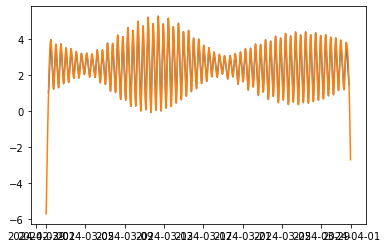

In [42]:
plt.plot(df[df.Port == 'Aberdaron'].Datetime, df[df.Port == 'Aberdaron'].Height)

plt.plot(aber_df_test.Datetime, aber_df_test.Height)


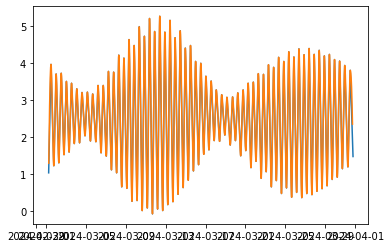

In [43]:
start_cut = 24 # Drop problematic endpoints
end_cut = 20

plt.plot(df[df.Port == 'Aberdaron'].Datetime, df[df.Port == 'Aberdaron'].Height)

plt.plot(aber_df_test.Datetime[start_cut:-end_cut], aber_df_test.Height[start_cut:-end_cut])


Interpolate full dataframe:

In [45]:
location_array = df.Port.unique()

In [46]:
df_interp = pd.DataFrame(columns=['Port',
                                  'Datetime',
                                  'Height',
                                  'geometry',
                                  'address'])

for port_name in location_array:

    df_interp = pd.concat([df_interp, 
                           interpolate_height_per_port2(port_name, df, lin_dt_range)])

    


In [47]:
df_interp

,Port,Datetime,Height,geometry,address
0,Aberdaron,2024-03-01 00:00:00,-5.696321,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
1,Aberdaron,2024-03-01 00:15:00,-5.365803,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
2,Aberdaron,2024-03-01 00:30:00,-5.036709,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
3,Aberdaron,2024-03-01 00:45:00,-4.709305,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
4,Aberdaron,2024-03-01 01:00:00,-4.383860,POINT (-4.7126197 52.8050969),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
...,...,...,...,...,...
2968,Youghal,2024-03-31 22:00:00,3.312593,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"
2969,Youghal,2024-03-31 22:15:00,3.509767,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"
2970,Youghal,2024-03-31 22:30:00,3.714383,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"
2971,Youghal,2024-03-31 22:45:00,3.926373,POINT (-7.8431892 51.9494736),"Youghal, County Cork, Munster, Éire / Ireland"


In [48]:
df_interp = df_interp[(df_interp.Datetime>=lin_dt_range[start_cut])&(df_interp.Datetime<=lin_dt_range[-end_cut])]
# Get rid of end data whic interpolated incorrectly due to missing data

In [52]:
df_interp.to_csv('interpolated_port_df_quarter_hour.csv') # Export to avoid interpolation in the future

## Plotting

In [53]:
df_interp.geometry

24      POINT (-4.7126197 52.8050969)
25      POINT (-4.7126197 52.8050969)
26      POINT (-4.7126197 52.8050969)
27      POINT (-4.7126197 52.8050969)
28      POINT (-4.7126197 52.8050969)
                    ...              
2949    POINT (-7.8431892 51.9494736)
2950    POINT (-7.8431892 51.9494736)
2951    POINT (-7.8431892 51.9494736)
2952    POINT (-7.8431892 51.9494736)
2953    POINT (-7.8431892 51.9494736)
Name: geometry, Length: 1807810, dtype: object

In [54]:
df_interp['geometry'] = gpd.GeoSeries.from_wkt(df_interp.geometry)

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
df_interp.dtypes

Port                object
Datetime    datetime64[ns]
Height             float64
geometry          geometry
address             object
dtype: object

In [56]:
gdf = gpd.GeoDataFrame(df_interp, geometry='geometry')
gdf

,Port,Datetime,Height,geometry,address
24,Aberdaron,2024-03-01 06:00:00,1.301255,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
25,Aberdaron,2024-03-01 06:15:00,1.523698,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
26,Aberdaron,2024-03-01 06:30:00,1.738289,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
27,Aberdaron,2024-03-01 06:45:00,1.944762,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
28,Aberdaron,2024-03-01 07:00:00,2.142848,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U..."
...,...,...,...,...,...
2949,Youghal,2024-03-31 17:15:00,1.072080,POINT (-7.84319 51.94947),"Youghal, County Cork, Munster, Éire / Ireland"
2950,Youghal,2024-03-31 17:30:00,1.114745,POINT (-7.84319 51.94947),"Youghal, County Cork, Munster, Éire / Ireland"
2951,Youghal,2024-03-31 17:45:00,1.166163,POINT (-7.84319 51.94947),"Youghal, County Cork, Munster, Éire / Ireland"
2952,Youghal,2024-03-31 18:00:00,1.226264,POINT (-7.84319 51.94947),"Youghal, County Cork, Munster, Éire / Ireland"


In [57]:
# Background map data

filepath_river = 'River1Clip/RiverClip1.dbf' 
river1_df = gpd.read_file(filepath_river)

filepath_river2 = 'River2Clip/RiverClip2.dbf'
river2_df = gpd.read_file(filepath_river2)

filepath_lake = 'LakeClip/LakeClip.dbf'
lake_df = gpd.read_file(filepath_lake)

Map data from [Natural Earth](https://www.naturalearthdata.com/). Manually clipped in QGIS

In [58]:
lake_df

,id,name,lge_id,pfafstette,lke_type,altitude,objectid,scalerank,featurecla,note,...,name_tr,name_vi,name_zh,ne_id,name_he,name_uk,name_ur,name_fa,name_zht,geometry
0,98696.0,Loch Bhanabhaidh,None,57.0,N,92,52843,11,Lake,None,...,None,None,None,1159107695,None,None,None,None,None,"POLYGON ((-4.62511 58.14368, -4.65435 58.15528..."
1,100550.0,Loch Maree,None,1.0,N,39,54265,12,Lake,None,...,None,None,馬里湖,1159107771,None,None,None,None,馬里湖,"POLYGON ((-5.34704 57.63795, -5.38231 57.65687..."
2,103640.0,None,None,1.0,N,3,56386,12,Lake,_untitled_56386,...,None,None,None,1159107819,None,None,None,None,None,"POLYGON ((-5.72851 56.76136, -5.72881 56.76771..."
3,103920.0,None,None,943.0,N,358,56990,12,Lake,_untitled_56990,...,None,None,None,1159107843,None,None,None,None,None,"POLYGON ((-4.43004 56.78022, -4.44524 56.75257..."
4,104752.0,Loch Rannoch,None,9153.0,N,205,57822,12,Lake,None,...,None,None,蘭諾赫湖,1159107895,לוך רנוך,None,None,None,蘭諾赫湖,"POLYGON ((-4.21758 56.69691, -4.25011 56.69666..."
5,105653.0,Loch Awe,None,15.0,N,124,58413,11,Lake,None,...,None,None,奥湖,1159107991,לוך או,Лох-Ейв,None,None,奧湖,"POLYGON ((-5.07195 56.37049, -5.10326 56.36353..."
6,105409.0,None,None,6551.0,N,126,58448,12,Lake,_untitled_58448,...,None,None,None,1159108021,None,None,None,None,None,"POLYGON ((-4.29723 56.47748, -4.30114 56.48353..."
7,106243.0,Loch Lomond North Basin,None,15.0,N,9,59258,10,Lake,None,...,Lomond,None,洛蒙德湖,1159108027,לוך לומונד,Лох-Ломонд,لوچ لومونڈ,دریاچه لوموند,洛蒙德湖,"POLYGON ((-4.52025 56.07874, -4.52208 56.06837..."
8,110629.0,Lower Lough Erne,en,1151.0,N,40,62367,10,Lake,None,...,None,None,None,1159108275,None,None,None,None,None,"POLYGON ((-7.66369 54.41004, -7.65276 54.39033..."
9,110689.0,Lough Melvin,en,1.0,None,24,62564,12,Lake,None,...,Melvin,None,None,1159108303,None,None,None,None,None,"POLYGON ((-8.10314 54.41694, -8.12804 54.42786..."


In [60]:
filepath = 'Clipped3/UKlandClip3.dbf'

map_df = gpd.read_file(filepath)
map_df.head()

,featurecla,scalerank,min_zoom,geometry
0,Land,0.0,0.0,"MULTIPOLYGON (((-4.22949 48.30954, -4.23054 48..."
1,Land,6.0,5.0,"MULTIPOLYGON (((0.93247 51.39769, 0.94215 51.3..."
2,Land,5.0,3.0,"MULTIPOLYGON (((-2.06786 49.25068, -2.02066 49..."
3,Land,6.0,6.0,"MULTIPOLYGON (((-5.04817 48.47651, -5.04625 48..."
4,Land,5.0,4.0,"MULTIPOLYGON (((-2.55956 49.49934, -2.53820 49..."


In [61]:
%matplotlib inline

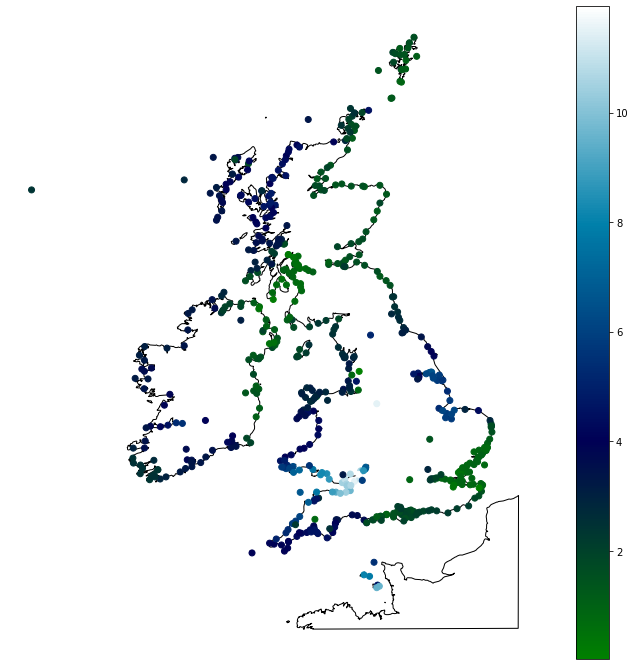

In [62]:
fig, ax = plt.subplots(1, figsize=(12, 12))

map_df.plot(ax = ax, color='white', edgecolor='black')

gdf[gdf.Datetime == lin_dt_range[40]].plot(column='Height',
                                          ax=ax, 
                                          cmap='ocean',
                                          legend=True)

ax.set_aspect('auto')

for spine in plt.gca().spines.values():
        spine.set_visible(False)
        
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# fig.colorbar()

plt.show()

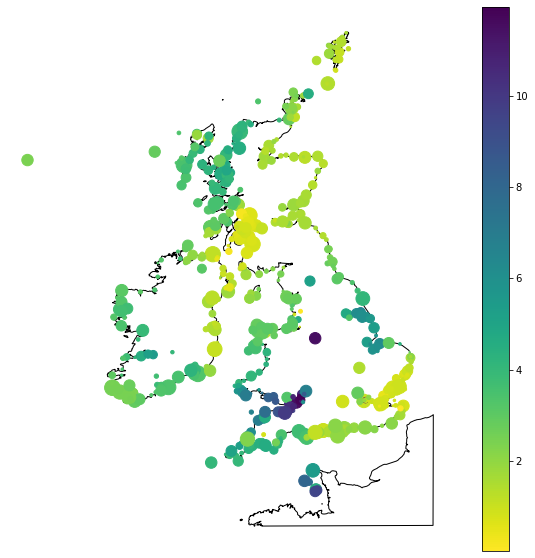

In [63]:
fig, ax = plt.subplots(1, figsize=(10, 10))

map_df.plot(ax = ax, color='white', edgecolor='black')

gdf[gdf.Datetime == lin_dt_range[40]].plot(column='Height',
                                          ax=ax, 
                                          cmap='viridis_r',
                                          legend=True, 
                                         markersize=gdf['Height']**4)

ax.set_aspect('auto')

for spine in plt.gca().spines.values():
        spine.set_visible(False)
        
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# fig.colorbar()

plt.show()

<IPython.core.display.Javascript object>


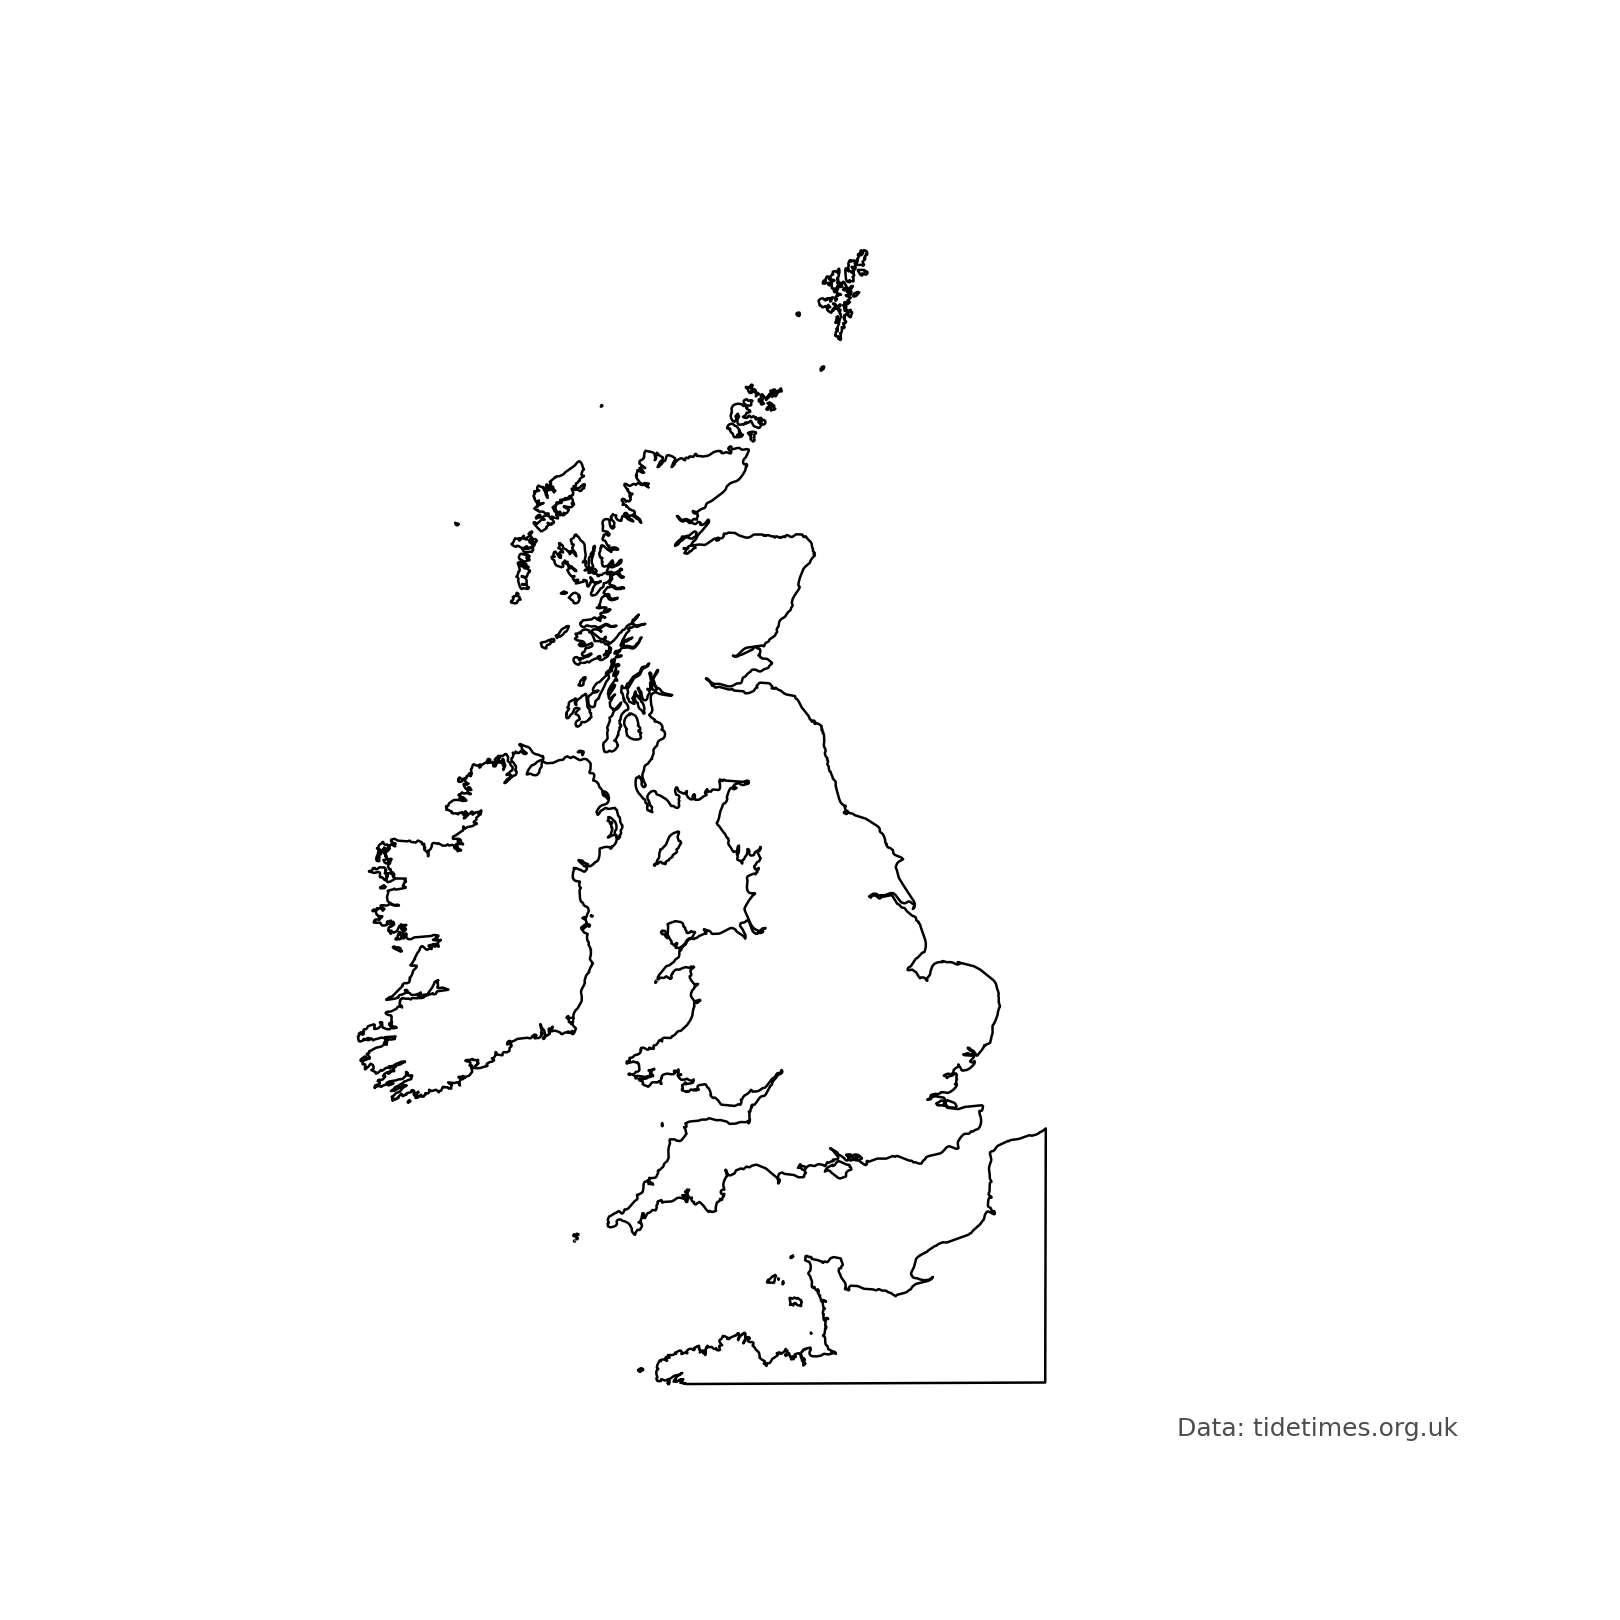

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


In [64]:
%matplotlib notebook

colourmap = 'viridis'
map_min = -3.0
map_max = 14

# Following code cells required to generate and save gif frames

fig1, axes = plt.subplots(1,2,figsize=(9,9), 
                          gridspec_kw={'width_ratios': [7, 1]}) # Set up figure canvas
ax1 = axes[0] # background map axes
ax3 = axes[1] # spaced legend axes

map_df.plot(ax = ax1, color='white', edgecolor='black')


    
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_facecolor('none')

# ax2.set_xticklabels([])
# ax2.set_yticklabels([])
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_facecolor('none')

ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_facecolor('none')

for spine in ax1.spines.values(): # using subplot for spacing - remove all the borders and ticks etc. 
    spine.set_visible(False)
    

for spine in ax3.spines.values(): # using subplot for spacing - remove all the borders and ticks etc. 
    spine.set_visible(False)
    

ax3.annotate('Data: tidetimes.org.uk', (1, 0), textcoords='axes fraction',
                verticalalignment='bottom', horizontalalignment='right', alpha=0.7)

xlims = ax1.get_xlim()
ylims = ax1.get_ylim();



In [65]:
# ax2 = ax1.twiny().twinx() # tide plotting twinxy

# plt.sca(ax2)

plt.sca(ax1)


DOWNLOAD = False

fig_counter = 1

groupby = df_interp.groupby('Datetime')

for dt in df_interp.Datetime.unique()[:30]:
    
    plt.gca().cla()
        
    frame = gpd.GeoDataFrame(groupby.get_group(dt))
    
    map_df.plot(ax = ax1, color='white', edgecolor='black')

    
    frame.plot(column='Height', 
               ax=ax1, 
               cmap=colourmap, 
               vmin=map_min, 
               vmax=map_max,
              markersize=4**gdf['Height'])
    
    plt.axis('scaled')
    
#     ax2.set_position(ax1.get_position())
    
#     ax2.set_xlim(xlims)
#     ax2.set_ylim(ylims)
    
#     ax2.legend(bbox_to_anchor=(1,0.5), loc="center left", frameon=False)
#     plt.subplots_adjust(right=.85)
    

#     plt.tick_params(axis='x',bottom=False, left=False)
#     plt.tick_params(axis='y',bottom=False, left=False)
    
#     plt.setp(ax1.get_xticklabels(), alpha=alph) # Change tick label alpha
#     plt.setp(ax1.get_yticklabels(), alpha=alph)
    
#     ax1.yaxis.set_major_formatter(FormatStrFormatter(r'%d %%'))

    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_facecolor('none')
    
    for spine in ax1.spines.values(): # using subplot for spacing - remove all the borders and ticks etc. 
        spine.set_visible(False)
    
#     fig1.canvas.draw()
    
    if dt == df_interp.Datetime.unique()[0]:
        plt.show()

    else:
        fig1.canvas.draw()
    
    
    if DOWNLOAD: # These frames can be made into a gif using ffmpeg - serious TODO here is to use animate package instead
        plt.savefig('frames/UK_price_ripple_'+str(fig_counter))
        fig_counter+=1
        
    
    plt.pause(0.1)

In [66]:
map_df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Lets just get one frame correct - ditch the subplot spacing

In [67]:
%matplotlib notebook

<IPython.core.display.Javascript object>


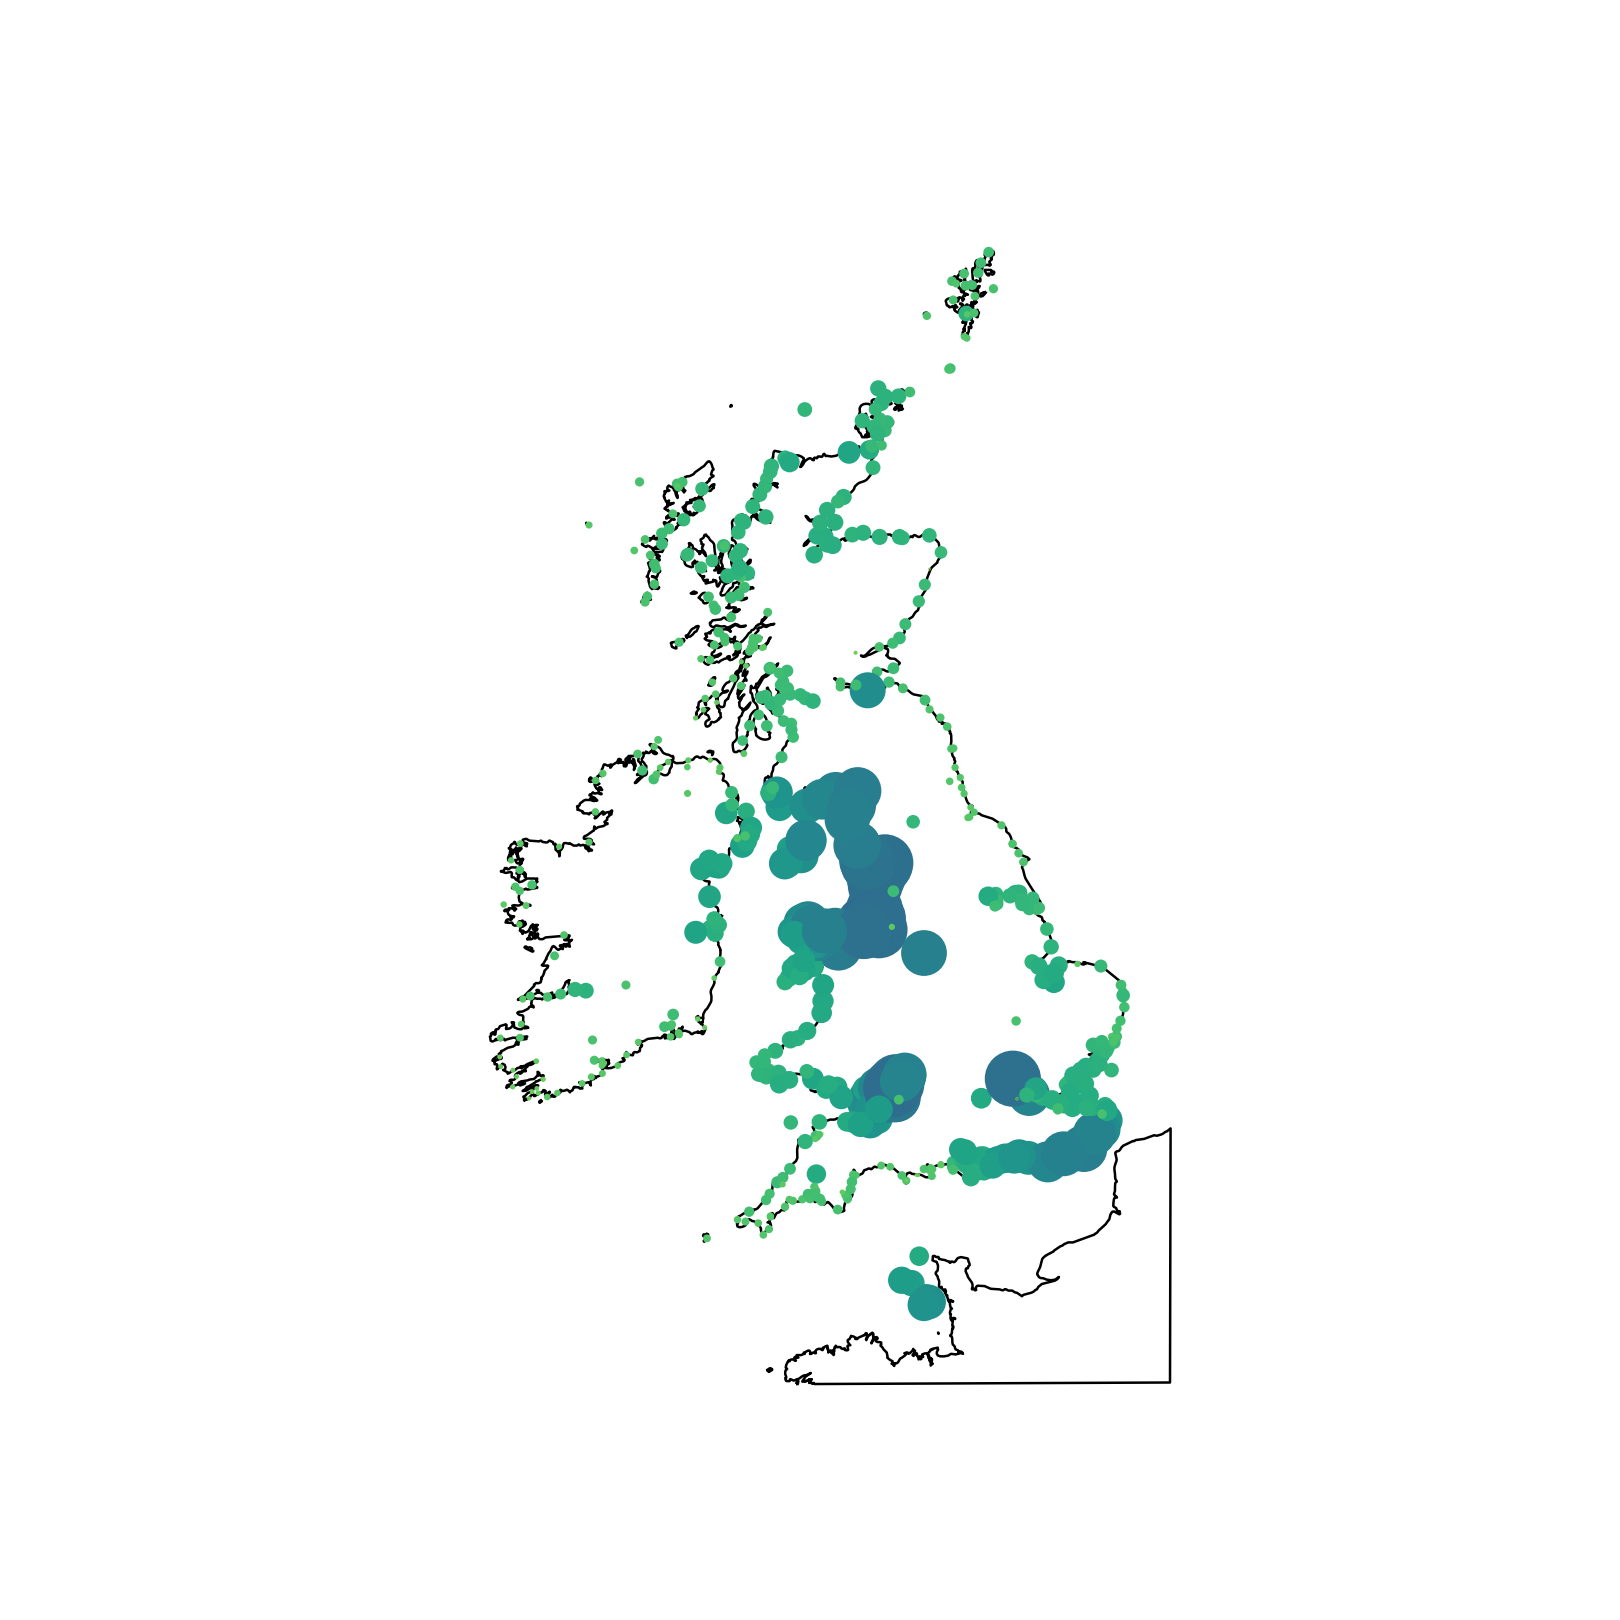

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


In [68]:
colourmap = 'viridis'
map_min = -3.0
map_max = 14

# Following code cells required to generate and save gif frames

fig, ax1 = plt.subplots(1,1,figsize=(9,9))

map_df.plot(ax = ax1, color='white', edgecolor='black') # Plot background map file
    
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_facecolor('none')


for spine in ax1.spines.values(): # remove all the borders and ticks etc. 
    spine.set_visible(False)
    

ax1.annotate('Data: tidetimes.org.uk', (1, 0), textcoords='axes fraction',
                verticalalignment='bottom', horizontalalignment='right', alpha=0.7)

xlims = ax1.get_xlim() # Store x and y limits for second axis
ylims = ax1.get_ylim();

In [69]:
groupby = df_interp.groupby('Datetime')

In [70]:
plt.cla()

In [71]:
download = False

colourmap='viridis_r'

for dt in df_interp.Datetime.unique()[:30]:
    
    plt.cla()

    frame = gpd.GeoDataFrame(groupby.get_group(dt))

    frame.crs = 'EPSG:4326'
    
    frame['markersize'] = frame.Height**3

    map_df.plot(ax = ax1, color='white', edgecolor='black') # Plot background map file

    frame.plot(column='Height',
               ax=ax1,
               cmap=colourmap,
               vmin=map_min,
               vmax=map_max,
               markersize='markersize')

    ax1.set_xlim(xlims)
    ax1.set_ylim(ylims)
    
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_facecolor('none')
    
    if dt == df_interp.Datetime.unique()[0]:
        plt.show()

    else:
        fig.canvas.draw()
    
    
    if DOWNLOAD: # These frames can be made into a gif using ffmpeg - serious TODO here is to use animate package instead
        plt.savefig('frames/UK_price_ripple_'+str(fig_counter))
        fig_counter+=1
        
    
    plt.pause(0.1)

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

Okay so evidently this works, however the effect I want to show is the sweeping around of the high tide around scotland, meeting London with the next high tide that has come through the english channel. 

Let's normalise/remap the tide highs and lows so that we're just looking at tidal swing, not the absolute value.

In [72]:
def remap_tide_per_location(df, location):
    '''Given a df and location, return an array of remapped Tide Height values
    between 0 and 1'''
    
    df_port = df[df.Port == location]
    
    tides = df_port.Height
    
    max_tide = max(tides)
    min_tide = min(tides)
    
    norm_tides = np.array([(x-min_tide)/(max_tide-min_tide) for x in tides])
    
    return norm_tides
    

In [73]:
df_interp['norm_height'] = 0.0

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
remap_tide_per_location(df_interp, 'Aberdaron')

array([0.25627909, 0.29796726, 0.33818405, ..., 0.48112113, 0.45398349,
       0.42515801])

In [75]:
for location in df_interp.Port.unique():
    
#     df_interp.[df_interp.Port == location].norm_hight = remap_tide_per_location(df_interp, location)
    
#     df_interp[df_interp.Port == location].norm_height = remap_tide_per_location(df_interp, location)
    
#     df_interp.loc[df_interp.Port==location, 'norm_height'] = 1 = this works

    df_interp.loc[df_interp.Port==location, 'norm_height'] = remap_tide_per_location(df_interp, location)
    
df_interp

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Port,Datetime,Height,geometry,address,norm_height
24,Aberdaron,2024-03-01 06:00:00,1.301255,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.256279
25,Aberdaron,2024-03-01 06:15:00,1.523698,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.297967
26,Aberdaron,2024-03-01 06:30:00,1.738289,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.338184
27,Aberdaron,2024-03-01 06:45:00,1.944762,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.376879
28,Aberdaron,2024-03-01 07:00:00,2.142848,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.414003
...,...,...,...,...,...,...
2949,Youghal,2024-03-31 17:15:00,1.072080,POINT (-7.84319 51.94947),"Youghal, County Cork, Munster, Éire / Ireland",0.283642
2950,Youghal,2024-03-31 17:30:00,1.114745,POINT (-7.84319 51.94947),"Youghal, County Cork, Munster, Éire / Ireland",0.293637
2951,Youghal,2024-03-31 17:45:00,1.166163,POINT (-7.84319 51.94947),"Youghal, County Cork, Munster, Éire / Ireland",0.305683
2952,Youghal,2024-03-31 18:00:00,1.226264,POINT (-7.84319 51.94947),"Youghal, County Cork, Munster, Éire / Ireland",0.319763


In [76]:
df_interp[df_interp.Port == 'Aberdaron']

,Port,Datetime,Height,geometry,address,norm_height
24,Aberdaron,2024-03-01 06:00:00,1.301255,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.256279
25,Aberdaron,2024-03-01 06:15:00,1.523698,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.297967
26,Aberdaron,2024-03-01 06:30:00,1.738289,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.338184
27,Aberdaron,2024-03-01 06:45:00,1.944762,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.376879
28,Aberdaron,2024-03-01 07:00:00,2.142848,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.414003
...,...,...,...,...,...,...
2949,Aberdaron,2024-03-31 17:15:00,2.764358,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.530480
2950,Aberdaron,2024-03-31 17:30:00,2.636977,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.506608
2951,Aberdaron,2024-03-31 17:45:00,2.500983,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.481121
2952,Aberdaron,2024-03-31 18:00:00,2.356180,POINT (-4.71262 52.80510),"Aberdaron, Gwynedd, Cymru / Wales, LL53 8BE, U...",0.453983


In [185]:
pd.to_datetime(df_interp.Datetime.unique()[0]).strftime("%d %B, %Y")

'01 March, 2024'

<IPython.core.display.Javascript object>


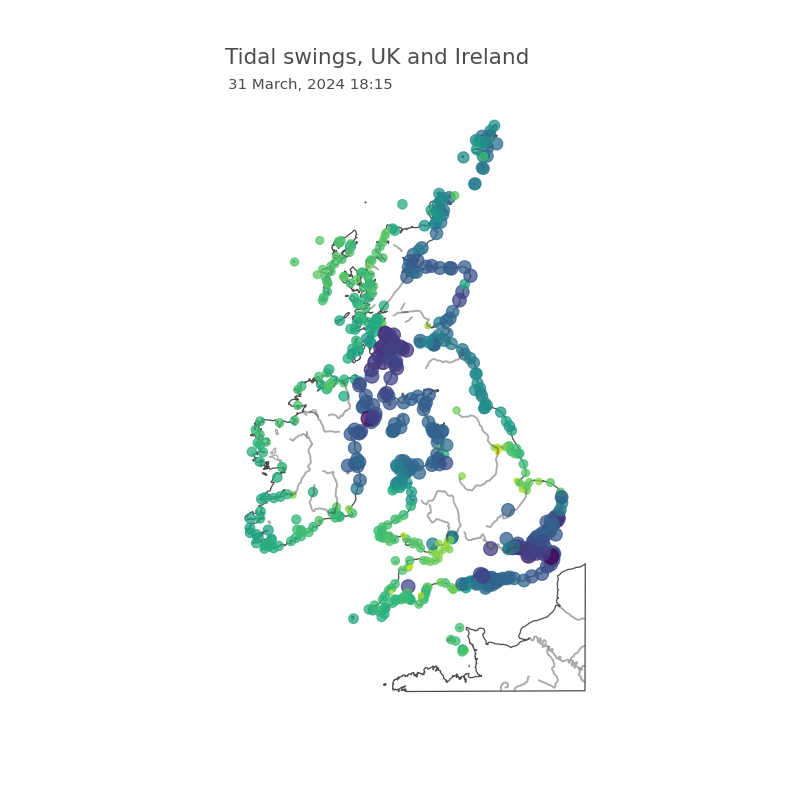

In [186]:
colourmap = 'viridis'
map_min = -3.0
map_max = 14

# Following code cells required to generate and save gif frames

fig, ax1 = plt.subplots(1,1,figsize=(9,9))

map_df.plot(ax = ax1, color='white', edgecolor='#21201e', alpha = 0.65) # Plot background map file
river1_df.plot(ax=ax1, color='#45433f', edgecolor='black', alpha = 0.35)
river2_df.plot(ax=ax1, color='#45433f', edgecolor='black', alpha = 0.35)
lake_df.plot(ax=ax1, color='white', edgecolor='#45433f', alpha = 0.35)

plt.suptitle('Tidal swings, UK and Ireland',
             horizontalalignment='left', 
             x=0.278,
             y=0.94,
             size='xx-large',
             alpha = 0.7)

plt.title(f'{pd.to_datetime(df_interp.Datetime.unique()[0]).strftime("%d %B, %Y %H:%M")}',
          loc='left',
          alpha = 0.7)

    
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_facecolor('none')


for spine in ax1.spines.values(): # remove all the borders and ticks etc. 
    spine.set_visible(False)
    

ax1.text(0.65, 1.9, 'Data: tidetimes.org.uk\n          Natural Earth', fontsize=10, alpha=0.3, transform=ax.transAxes)#, textcoords='axes fraction',

xlims = ax1.get_xlim() # Store x and y limits for second axis
ylims = ax1.get_ylim();

In [182]:
download = True

colourmap='viridis_r'

fig_counter=1

for dt in df_interp.Datetime.unique():
    
    plt.cla()

    frame = gpd.GeoDataFrame(groupby.get_group(dt))

    frame.crs = 'EPSG:4326'
    
    frame['markersize'] = frame.Height*20

    map_df.plot(ax = ax1, color='white', edgecolor='#21201e', alpha = 0.8) # Plot background map file
    river1_df.plot(ax=ax1, color='#45433f', edgecolor='black', alpha = 0.45)
    river2_df.plot(ax=ax1, color='#45433f', edgecolor='black', alpha = 0.45)
    lake_df.plot(ax=ax1, color='white', edgecolor='#45433f', alpha = 0.45)
    
    plt.suptitle('Tidal swings, UK and Ireland',
             horizontalalignment='left', 
             x=0.278,
             y=0.94,
             size='xx-large',
             alpha = 0.7)

    plt.title(f'{pd.to_datetime(dt).strftime("%d %B, %Y %H:%M")}',
              loc='left',
              alpha = 0.7)
    
    ax1.text(0.65, 1.9, 
             'Data: tidetimes.org.uk\n          Natural Earth', 
             fontsize=10, 
             alpha=0.3, 
             transform=ax.transAxes)    
    
    frame.plot(column='Height',
               ax=ax1,
               cmap=colourmap,
               alpha = 0.75,
               vmin=-3,
               vmax=14,
               markersize='markersize')

    ax1.set_xlim(xlims)
    ax1.set_ylim(ylims)
    
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_facecolor('none')
    
    if dt == df_interp.Datetime.unique()[0]:
        plt.show()

    else:
        fig.canvas.draw()
    
    
    if download: # These frames can be made into a gif using ffmpeg - serious TODO here is to use animate package instead
        plt.savefig('frames_abs/isles_tides_15min_abs_'+str(fig_counter))
        fig_counter+=1
        
    plt.pause(0.01)

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib/collections.py:980: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/gabrielcoulter/opt/anaconda3/envs/data_science_env/lib/python3.7/site-packages/matplotlib

In [187]:
download = True

colourmap='viridis_r'

fig_counter=1

for dt in df_interp.Datetime.unique():
    
    plt.cla()

    frame = gpd.GeoDataFrame(groupby.get_group(dt))

    frame.crs = 'EPSG:4326'
    
    frame['markersize'] = frame.norm_height*150

    map_df.plot(ax = ax1, color='white', edgecolor='#21201e', alpha = 0.8) # Plot background map file
    river1_df.plot(ax=ax1, color='#45433f', edgecolor='black', alpha = 0.45)
    river2_df.plot(ax=ax1, color='#45433f', edgecolor='black', alpha = 0.45)
    lake_df.plot(ax=ax1, color='white', edgecolor='#45433f', alpha = 0.45)
    
    plt.suptitle('Tidal swings, UK and Ireland',
             horizontalalignment='left', 
             x=0.278,
             y=0.94,
             size='xx-large',
             alpha = 0.7)

    plt.title(f'{pd.to_datetime(dt).strftime("%d %B, %Y %H:%M")}',
              loc='left',
              alpha = 0.7)
    
    ax1.text(0.65, 1.9, 
             'Data: tidetimes.org.uk\n          Natural Earth', 
             fontsize=10, 
             alpha=0.3, 
             transform=ax.transAxes)    
    
    frame.plot(column='norm_height',
               ax=ax1,
               cmap=colourmap,
               alpha = 0.75,
               vmin=0.0,
               vmax=1.0,
               markersize='markersize')

    ax1.set_xlim(xlims)
    ax1.set_ylim(ylims)
    
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_facecolor('none')
    
    if dt == df_interp.Datetime.unique()[0]:
        plt.show()

    else:
        fig.canvas.draw()
    
    
    if download: # These frames can be made into a gif using ffmpeg - serious TODO here is to use animate package instead
        plt.savefig('frames_norm/isles_tides_15min_norm_'+str(fig_counter))
        fig_counter+=1
        
    plt.pause(0.01)

In [159]:
! pwd

/Users/gabrielcoulter/Google Drive/ProjectFiles/Python/DataScienceProjects/UkIrelandTidalData


In [191]:
! ffmpeg -i frames_abs/isles_tides_15min_abs_%d.png -vf palettegen palette_abs.png  # needs palette otherwise colours are messed up

ffmpeg version 4.4 Copyright (c) 2000-2021 the FFmpeg developers
  built with Apple clang version 12.0.5 (clang-1205.0.22.9)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/4.4_2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-avresample --enable-videotoolbox
  libavutil      5

In [193]:
! ffmpeg -framerate 16 -i frames_norm/isles_tides_15min_norm_%d.png -i palette_abs.png -lavfi paletteuse frames_norm/isles_tides_15min_norm_16fps.gif 
    # create gif from frames

ffmpeg version 4.4 Copyright (c) 2000-2021 the FFmpeg developers
  built with Apple clang version 12.0.5 (clang-1205.0.22.9)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/4.4_2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-avresample --enable-videotoolbox
  libavutil      5